In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [5]:
# Dataset A: Low correlation
X_low_corr, y_low_corr = make_classification(
    n_samples=1000,
    n_features=10,
    n_informative=10,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=42,
    shuffle=True
)

df_low_corr = pd.DataFrame(X_low_corr, columns=[f"F{i}" for i in range(10)])
df_low_corr['target'] = y_low_corr
df_low_corr.head()


,F0,F1,F2,F3,F4,F5,F6,F7,F8,F9,target
0,-5.104035,0.879510,2.253998,-1.128751,2.564330,0.151629,-0.042673,-3.067804,5.973162,4.377078,1
1,-2.329455,0.854820,3.317184,0.319984,-0.086787,3.052517,-0.697475,-3.495796,2.085744,5.030792,1
2,-2.898163,-3.732882,1.279338,-1.373345,1.827118,-1.790316,1.043463,-0.954424,1.604635,0.757000,1
3,-2.744436,-2.077194,-0.370316,-3.752696,-0.464013,-0.504653,0.155594,-1.050945,2.106429,2.711650,1
4,1.436430,-0.561775,1.965805,0.398637,-1.030291,-0.835830,-0.280515,2.126463,2.338088,-0.614807,0


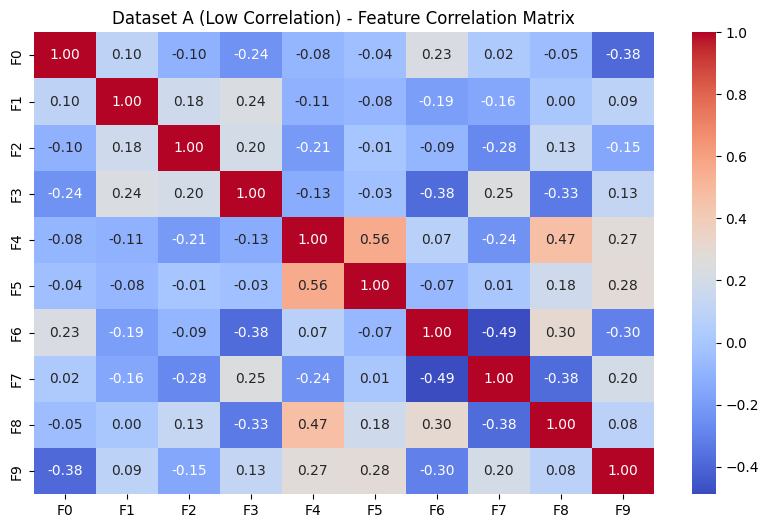

In [6]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_low_corr.iloc[:, :-1].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Dataset A (Low Correlation) - Feature Correlation Matrix")
plt.show()


In [7]:
# Dataset B: High correlation (with 5 redundant features)
X_high_corr, y_high_corr = make_classification(
    n_samples=1000,
    n_features=10,
    n_informative=5,
    n_redundant=5,
    n_clusters_per_class=1,
    random_state=42,
    shuffle=True
)

df_high_corr = pd.DataFrame(X_high_corr, columns=[f"F{i}" for i in range(10)])
df_high_corr['target'] = y_high_corr
df_high_corr.head()


,F0,F1,F2,F3,F4,F5,F6,F7,F8,F9,target
0,-0.967979,1.395398,0.125853,3.296276,0.171879,1.367594,1.860681,0.244457,1.083645,-0.549696,1
1,0.731559,-0.484200,-0.153285,0.935066,1.321370,2.355913,0.096461,3.458337,2.901847,1.628144,0
2,-1.910142,-1.682316,1.003937,-1.423475,0.190523,-2.133881,-4.145622,3.774033,3.734368,0.072171,0
3,-2.082904,0.486251,-0.025239,2.393410,0.353223,-0.841111,0.065563,-0.218303,1.841278,-2.154869,1
4,-2.530333,-1.121950,1.799365,-0.501198,0.384220,-0.499823,-3.533727,2.679319,1.433927,0.392283,0


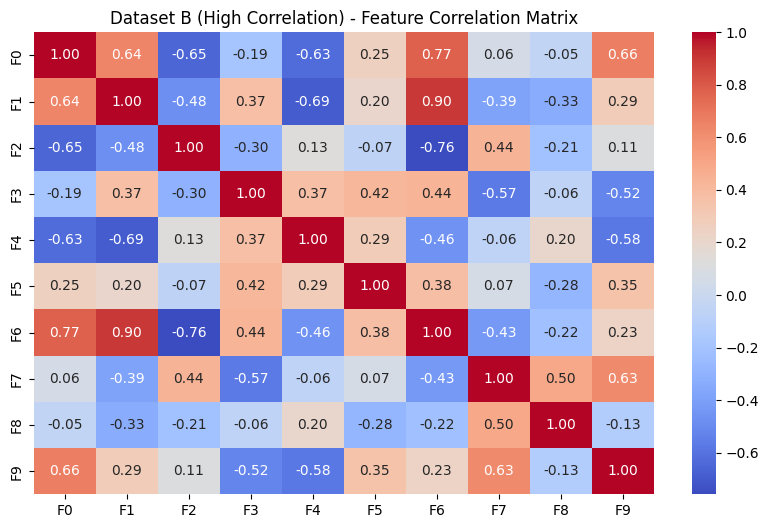

In [8]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_high_corr.iloc[:, :-1].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Dataset B (High Correlation) - Feature Correlation Matrix")
plt.show()


In [9]:
# Add Gaussian noise to high correlation dataset
noise = np.random.normal(0, 2, size=X_high_corr.shape)
X_high_corr = X_high_corr + noise

# Train/test split
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(
    X_low_corr, y_low_corr, test_size=0.2, random_state=42)

# Naive Bayes
nb_a = GaussianNB()
nb_a.fit(X_train_a, y_train_a)

# Predictions & accuracy
y_pred_a = nb_a.predict(X_test_a)
accuracy_a = accuracy_score(y_test_a, y_pred_a)

print(f"Accuracy on Dataset A (Low Correlation): {accuracy_a:.4f}")


Accuracy on Dataset A (Low Correlation): 0.9350


In [14]:
# Add Gaussian noise to high correlation dataset
noise = np.random.normal(0, 2, size=X_high_corr.shape)
X_noisy_high_corr = X_high_corr + noise

# Train/test split
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(
    X_noisy_high_corr, y_high_corr, test_size=0.2, random_state=42)

# Train & evaluate Naive Bayes
nb_b = GaussianNB()
nb_b.fit(X_train_b, y_train_b)
y_pred_b = nb_b.predict(X_test_b)
accuracy_b_noisy = accuracy_score(y_test_b, y_pred_b)
print(f"Accuracy on noisy high correlation dataset: {accuracy_b_noisy:.4f}")


Accuracy on noisy high correlation dataset: 0.7950


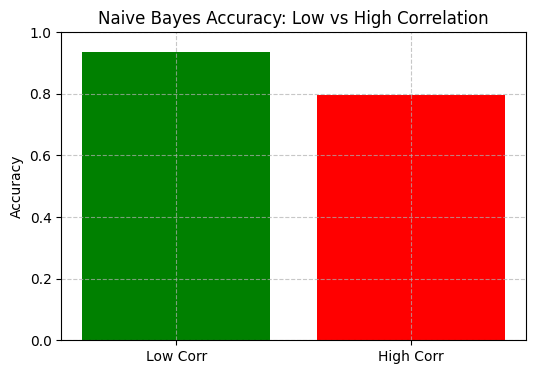

In [17]:
plt.figure(figsize=(6,4))
plt.bar(['Low Corr', 'High Corr'], [accuracy_a, accuracy_b_noisy], color=['green', 'red'])
plt.title("Naive Bayes Accuracy: Low vs High Correlation")
plt.ylabel("Accuracy")
plt.ylim(0.0, 1.0)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


In [18]:
print("Classification Report - Low Correlation Dataset:")
print(classification_report(y_test_a, y_pred_a))

print("Classification Report - High Correlation Dataset:")
print(classification_report(y_test_b, y_pred_b))


Classification Report - Low Correlation Dataset:
              precision    recall  f1-score   support

           0       0.96      0.91      0.94       105
           1       0.91      0.96      0.93        95

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.93       200
weighted avg       0.94      0.94      0.94       200

Classification Report - High Correlation Dataset:
              precision    recall  f1-score   support

           0       0.78      0.79      0.79        95
           1       0.81      0.80      0.80       105

    accuracy                           0.80       200
   macro avg       0.79      0.79      0.79       200
weighted avg       0.80      0.80      0.80       200



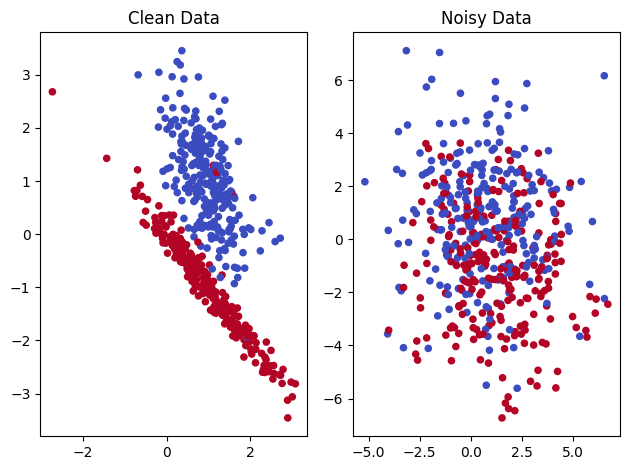

In [19]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

# Create a 2D dataset
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           n_clusters_per_class=1, n_samples=500, random_state=1)

# Add noise
X_noisy = X + np.random.normal(0, 2, size=X.shape)

# Plot original
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=20)
plt.title("Clean Data")

# Plot noisy
plt.subplot(1, 2, 2)
plt.scatter(X_noisy[:, 0], X_noisy[:, 1], c=y, cmap='coolwarm', s=20)
plt.title("Noisy Data")

plt.tight_layout()
plt.show()
